# Winconsin breast cancer: prediction of benign or malignant

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

This is the breast cancer dataset we are working with.

In [2]:
breast_cancer = load_breast_cancer()

In [3]:
X = breast_cancer.data
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Understanding Target Class

### What does the target 0, 1 represent?

The target {0,1} represent the two possible outcomes of breast cancer - benign (non-cancerous, 0), or malignant (cancerous, 1).

In [6]:
y = breast_cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
y_labels = breast_cancer.target_names
y_labels

array(['malignant', 'benign'], dtype='<U9')

### Train-test split
We will now split the data into 80% train, and 20% test.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) # try seed 123 & 404

In [9]:
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

In [10]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [11]:
y_pred = dt.predict(X_test)

In [12]:
acc = accuracy_score(y_pred, y_test)
print("Decision Tree test set accuracy: {:.2f}".format(acc))

Decision Tree test set accuracy: 0.95


https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py

In [13]:
logreg = LogisticRegression(random_state=1)

In [14]:
logreg.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [15]:
y_pred2 = logreg.predict(X_test)

In [16]:
acc = accuracy_score(y_pred2, y_test)
print("Log Reg Test set accuracy: {:.2f}".format(acc))

Log Reg Test set accuracy: 0.98


In [17]:
clfs = [logreg, dt]

In [1]:
help(plot_labeled_decision_regions)
Help on function plot_labeled_decision_regions in module __main__:

plot_labeled_decision_regions(X, y, models)
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

## Classification-tree learning

After evaluating the models for decision tree and logistic regression, let's do further analytics. This is to make robust models, to improve the models from just at the basic level. (which already has very high accuracy).

### Building blocks of a decision-tree
- Decision-tree: a data structure consisting of a hierarchy of nodes.
- Node: question or prediction.

Three kinds of nodes:
- Root: no parent node, question giving rise to two children nodes.
- Internal node: one parent node, question giving rise to two children nodes.
- Leaf - one parent node, no children nodes. This is known as a prediction.

### Prediction


### Information gain (IG)
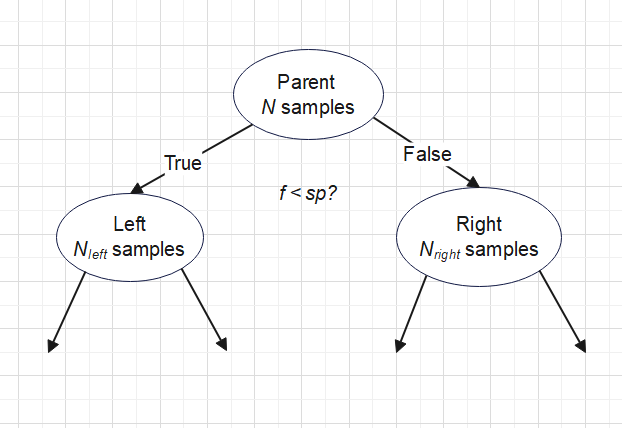

The formula for Information Gain (IG) is defined as:

$IG(f, sp) = I(parent) - \biggl[\frac{N_{left}}{N} I(left) + \frac{N_{right}}{N} I(right)\biggr] $

where:
- $f$ is the feature
- $sp$ is the split-point
- $N$ is the number of samples

The criteria to measure the impurity of a node, $I(node)$:
- gini index,
- entropy, etc.

Nodes are grown recursively. At each node, split the data based on the feature, $f$, and split-point $sp$, to maximise $IG(node)$.

If $IG(node)=0$, we declare the node as a leaf.

### Testing with criterion of node impurity, gini

In [18]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [19]:
y_pred_gini = dt.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred_gini)

0.9736842105263158

### Testing with criterion of node impurity, entropy

In [21]:
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [22]:
y_pred_entropy = dt.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred_entropy)

0.9736842105263158

Notice how the two models with different criterions, gini and entropy, produce almost the same accuracy (in fact exactly the same). Most of the time they lead to the same results. The gini index is a bit faster to compute, and is the default.

## Estimating the generalisation error
How do we estimate the generalisation error of a node? It cannot be done directly.

Let $y = f(x)$ be the function that is the originally the solution to the problem. $f$ is unknown.

The goal of supervised learning is to find a model, $\hat{f}$, that best approximates $f$: $\hat{f} \approx f$.

$\hat{f}$ can be a Logistic Regression, Decision Tree, Neural Network, etc. We should discard as much noise as possible. The end goal is to have $\hat{f}$ achieve a low predictive error, on unseen datasets.

### Difficulties in approximating $f$
- Overfitting: $\hat{f}$ fits the training set noise.
- Underfitting: $\hat{f}$ is not flexible enough to approximate $f$.

### Generalisation error
Does $\hat{f}$ generalise well on unseen data? 

In section 7.3 of "The Elements of Statistical Learning" (Hastie, Tibshirani, Friedman 2009), it can be decomposed as follows:


"If we assume that $Y = f(x) + \epsilon$ where $E(\epsilon) = 0$ and $Var(\epsilon) = \sigma^{2}_{\epsilon}$, we can derive an expected prediction error of a regression fit $\hat{f}(X)$ at an input point $X = x_{0}$, using squared-error loss:"

$Err(x_{0}) = E\biggl[[Y - \hat{f}(x_{0})]^{2} | X = x_{0} \biggr ]$

&emsp;&emsp;&emsp;&emsp; $= \sigma^{2}_{\epsilon} + [E\hat{f}(x_{0}) - f(x_{0})]^{2} - E[\hat{f}(x_{0}) - Ef(x_{0})]^{2}$

&emsp;&emsp;&emsp;&emsp; $= \sigma^{2}_{\epsilon} + Bias^{2}(\hat{f}(x_{0})) + Var(\hat{f}(x_{0}))$

&emsp;&emsp;&emsp;&emsp; $= \epsilon + Bias^{2} + Variance.
$

where $\epsilon$ is the irreducible error.

Bias is the error term that tells us, on avarage, how much $\hat{f} \neq f$.

Variane is how much $\hat{f}$ is inconsistent over different training sets.

Model complexity sets the flexibility of $\hat{f}$. For example, maximum tree depth, minimum samples per leaf, etc.

Then, $f$ is unknown, usually we only have one dataset, and noise is unpredictable


Now, we can use cross validation to optimise what we have, in the training set itself. There is no need to touch on the testing set, since cross-validation (CV) can cut the dataset into $k$-folds. 

There are two more basic types of CV methods:
- K-fold cross-validation
- hold-out cross-validation

We will only look at K-fold cross-validation.

In [24]:
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

The K-fold CV error is defined as:

$CV_{error} = \frac{E_{1} + ... + E_{10}}{10}$

This formula is nothing too fancy, but only the average of the errors of 10 folds.

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [26]:
y_pred_train = dt.predict(X_train)

In [27]:
y_pred_test = dt.predict(X_test)

In [28]:
print('CV MSE: {:.2f}'.format(MSE_CV_scores.mean()))

CV MSE: 0.06


In [29]:
print('Train MSE: {:.2f}'.format(MSE(y_train, y_pred_train)))

Train MSE: 0.00


In [30]:
print('Test MSE: {:.2f}'.format(MSE(y_test, y_pred_test)))

Test MSE: 0.03


### Explanation of the bias-variance trade off

How do we interpret the results?

If the CV error of $\hat{f}$ > training set error of $\hat{f}$, 

#### $\therefore \hat{f}$ suffers from high variance, and $\hat{f}$ is said to overfit the training set. 

To remedy overfitting, we can:
- increase model complexity,
- for ex: decrease max depth, increase min samples per leaf,
- gather more data

If the CV error of $\hat{f} \approx $ training set error of $\hat{f}$, and is > desired error. 

#### $\therefore \hat{f}$ suffers from high bias, and $\hat{f}$ is said to underfit the training set. 

To remedy underfitting, we can:
- increase model complexity 
- for ex: increase max depth, decrease min samples per leaf, etc
- gather more relevant features

Since CV error of $\hat{f}$ > training set error of $\hat{f}$, 
hence the k-fold CV has overfitted the model. Also, in theory, CV and test set errors are roughly equal.

## Ensemble learning
### Using a voting classifier in sklearn

In [31]:
SEED = 1

lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

In [33]:
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('{:s}: {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression: 0.982
K Nearest Neighbours: 0.965
Classification Tree: 0.974


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print('Voting Classifier: {}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.9824561403508771


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Bootstrap aggregation (bagging)

In the voting classifier, it is using the same training set
but in the bagging classifier, it does not. It samples a few samples from the dataset, and fits n models in the ensemble.

Since this is a classification problem, we can then try the bagging classifier method, instead of bagging regressor.

### Out-of-bag (OOB) evaluation
The OOB score of the bagging ensemble is evaluated as the 

In [46]:
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score = True, n_jobs=-1)
bc.fit(X_train, y_train)
bc_y_pred = bc.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [48]:
bc_accuracy = accuracy_score(y_test, bc_y_pred)
oob_accuracy = bc.oob_score_
print('Accuracy of Bagging Classifier: {:.3f}'.format(bc_accuracy))
print('OOB Accuracy: {:.3f}'.format(oob_accuracy))

Accuracy of Bagging Classifier: 0.991
OOB Accuracy: 0.956


### Sources:
Prediction/generalisation error derivation: https://stats.stackexchange.com/questions/44393/prediction-generalisation-error-derivation

DataCamp course on machine learning with tree based models in python: https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python

🦀 Breast Cancer Prediction Using Machine Learning: https://www.kaggle.com/code/vikasukani/breast-cancer-prediction-using-machine-learning\

Visualize a Decision Tree in 4 Ways with Scikit-Learn and Python: https://mljar.com/blog/visualize-decision-tree/